In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

%load_ext autoreload

In [23]:
event_file = '/gamma/Dropbox (GIN)/UCL_Data/events_files/unet_abnormal_training/fold_0/events.out.tfevents.1692202260.highdimneuro.8598.0'

# load the file
event_acc = EventAccumulator(event_file)
# print scalars
event_acc.Reload()
scalar_tags = event_acc.Tags()['scalars']

# Print the scalar tag names
print("Scalar Tags:")
for tag in scalar_tags:
    print(tag)
    
filtered_tags = ['epoch_train_loss', 'epoch_train_ctr_loss', 'val_mean_dice', 'val_distance', 'ctr_val_volume']

# do the same for all the tags containing 'best'
best_tags = [tag for tag in scalar_tags if 'best' in tag]
"""
epoch_train_loss
epoch_train_ctr_loss
val_mean_dice
ctr_val_loss
ctr_val_volume
val_distance
val_best_mean_dice
val_best_mean_loss
val_best_mean_distance

train = training
ctr = controls
val = validation
"""
translate_dict = {
    'epoch_train_loss': 'Training Loss',
    'epoch_train_ctr_loss': 'Training Controls Loss',
    'val_mean_dice': 'Validation Mean Dice',
    'ctr_val_loss': 'Validation Controls Loss',
    'ctr_val_volume': 'Validation Controls Volume',
    'val_distance': 'Validation Distance',
    'val_best_mean_dice': 'Validation Best Mean Dice',
    'val_best_mean_loss': 'Validation Best Mean Loss',
    'val_best_mean_distance': 'Validation Best Mean Distance'
}

Scalar Tags:
epoch_train_loss
val_mean_dice
val_distance
val_best_mean_dice
val_best_mean_loss
val_best_mean_distance


In [0]:
# do the same for both tags lists but point to the best value in the plot and display its value
# each tag containing "loss", "distance" or "volume" the best value is the lowest
# create a list like the tags lists but with the best value function to apply
best_func_filtered_tags = [min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in filtered_tags]
best_func_best_tags = [min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in best_tags]

# plot each scalar in a different subplot
fig, axs = plt.subplots(len(filtered_tags), 1, figsize=(10, len(filtered_tags)*5))
for i, tag in enumerate(filtered_tags):
    x, y = zip(*[(s.step, s.value) for s in event_acc.Scalars(tag)])
    axs[i].plot(x, y)
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel(tag)
    # find the best value
    best_value_func = best_func_filtered_tags[i]
    best_value = best_value_func(y)
    best_epoch = x[y.index(best_value)]
    axs[i].plot(best_epoch, best_value, 'ro')
    axs[i].set_title(f'{tag} (Best value: {best_value:.4f})')
plt.tight_layout()
plt.show()

# plot each scalar in a different subplot
fig, axs = plt.subplots(len(best_tags), 1, figsize=(10, len(best_tags)*5))
for i, tag in enumerate(best_tags):
    x, y = zip(*[(s.step, s.value) for s in event_acc.Scalars(tag)])
    axs[i].plot(x, y)
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel(tag)
    # find the best value
    best_value_func = best_func_best_tags[i]
    best_value = best_value_func(y)
    best_epoch = x[y.index(best_value)]
    axs[i].plot(best_epoch, best_value, 'ro')
    axs[i].set_title(f'{tag} (Best value: {best_value:.4f})')
plt.tight_layout()
plt.show()

NameError: name 'best_func_filtered_tags' is not defined

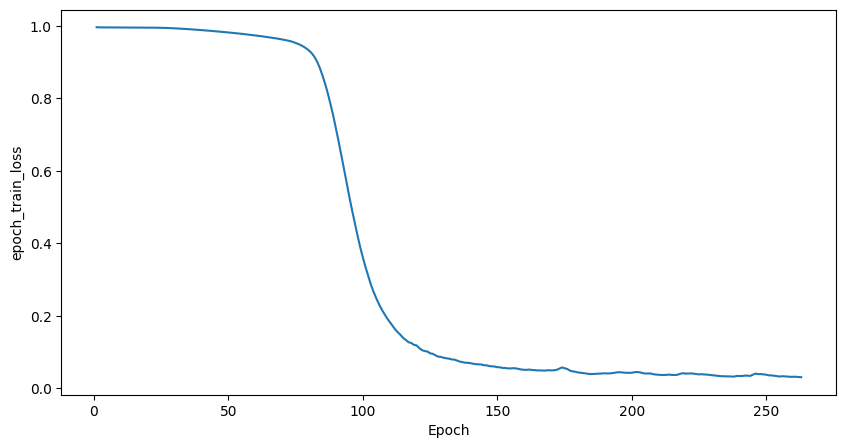

In [25]:
# plot each scalar in a different subplot and save each plot as a separate image file
output_folder = Path('/data/Dropbox (GIN)/result_ucl_lesseg')  # replace with your output folder path
for i, tag in enumerate(filtered_tags):
    fig, ax = plt.subplots(figsize=(10, 5))
    x, y = zip(*[(s.step, s.value) for s in event_acc.Scalars(tag)])
    ax.plot(x, y)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(tag)
    # find the best value
    best_value_func = best_func_filtered_tags[i]
    best_value = best_value_func(y)
    best_epoch = x[y.index(best_value)]
    ax.plot(best_epoch, best_value, 'ro')
    ax.set_title(f'Best value: {best_value:.4f}')
    plt.tight_layout()
    plt.savefig(output_folder / f'{tag}.png')
    plt.close(fig)  # close the figure

# do the same for the best_tags list
for i, tag in enumerate(best_tags):
    fig, ax = plt.subplots(figsize=(10, 5))
    x, y = zip(*[(s.step, s.value) for s in event_acc.Scalars(tag)])
    ax.plot(x, y)
    ax.set_xlabel('Epoch')
    ax.set_ylabel(tag)
    # find the best value
    best_value_func = best_func_best_tags[i]
    best_value = best_value_func(y)
    best_epoch = x[y.index(best_value)]
    ax.plot(best_epoch, best_value, 'ro')
    ax.set_title(f'Best value: {best_value:.4f}')
    plt.tight_layout()
    plt.savefig(output_folder / f'{tag}.png')
    plt.close(fig)  # close the figure

In [ ]:
from bcblib.tools.visualisation import create_and_save_plots, load_tensorboard_file

# /data/Dropbox (GIN)/UCL_Data/events_files contains several subfolders contains subfolders with event files
# For each subfolder of the root, load the event file and create and save the plots in /data/Dropbox (GIN)/UCL_Data/events_files/plots/subfolder_name

# best_func_filtered_tags = [min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in filtered_tags]
best_func_filtered_tags = {tag: min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in filtered_tags}
# best_func_best_tags = [min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in best_tags]
best_func_best_tags = {tag: min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in best_tags}
print(best_func_filtered_tags)
root_folder = Path('/data/Dropbox (GIN)/UCL_Data/events_files')
for subfolder in root_folder.iterdir():
    # root_folder / 'plots' should not be processed
    if subfolder.name == 'plots':
        continue
    print(f'Processing {subfolder.name}')
    # for each subfolder in subfolder
    for subsubfolder in subfolder.iterdir():
        # Load the event file
        event_file_list = list(subsubfolder.rglob('events.out.tfevents.*'))
        # only keep the latest event file using the date of modification
        event_file = max(event_file_list, key=os.path.getmtime)    
        event_acc = load_tensorboard_file(str(event_file))
        # Create the output folder subfolder_name/subsubfolder_name
        output_folder = root_folder / 'plots' / subfolder.name / subsubfolder.name
        output_folder.mkdir(parents=True, exist_ok=True)
        # Create and save the plots
        create_and_save_plots(event_acc, best_func_best_tags, output_folder=output_folder, display_plot=False)

In [24]:
%autoreload 2
from bcblib.tools.visualisation import load_all_event_files, plot_scalar_per_fold
best_tags = ['val_best_mean_dice', 'val_best_mean_loss', 'val_best_mean_distance', 'epoch_train_loss', 'epoch_train_ctr_loss', 'val_mean_dice', 'val_distance', 'ctr_val_volume']
# root_folder = Path('/data/Dropbox (GIN)/UCL_Data/events_files')
root_folder = Path('/gamma/Dropbox (GIN)/UCL_Data/events_files')
# for each subfolder in root_folder call plot_scalar_per_fold to save each scalar plot in subfolder/global_plots/
best_func_best_tags = {tag: min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in best_tags}

leading_tag = 'val_best_mean_dice'
# print(best_func_filtered_tags)
for subfolder in root_folder.iterdir():
    # root_folder / 'plots' should not be processed
    if subfolder.name == 'plots':
        continue
    print(f'Processing {subfolder.name}')
    # Load the event files
    fold_data = load_all_event_files(subfolder)
    # Create the output folder subfolder_name/global_plots
    output_folder = root_folder / 'plots' / subfolder.name / 'global_plots'
    output_folder.mkdir(parents=True, exist_ok=True)
    # Create and save the plots
    best_leading_values = {}
    for tag in best_tags:
        if tag not in fold_data['fold_1'].Tags()['scalars']:
            print(f'Tag {tag} not found in {subfolder.name}')
            continue
        if tag == leading_tag:
            best_leading_values = plot_scalar_per_fold(fold_data, tag, best_epochs=None, output_path=output_folder, display_plot=False, best_func=best_func_best_tags)
            print(f'Best leading values for {subfolder.name}: {best_leading_values}')
        else:
            plot_scalar_per_fold(fold_data, tag, best_epochs=best_leading_values, output_path=output_folder, display_plot=False, best_func=best_func_best_tags)

Processing abnormal_training_dice_focal
Best leading values for abnormal_training_dice_focal: {'fold_0': 141, 'fold_1': 246, 'fold_2': 173, 'fold_3': 163, 'fold_4': 154}
Tag epoch_train_ctr_loss not found in abnormal_training_dice_focal
Tag ctr_val_volume not found in abnormal_training_dice_focal
Processing unet_abnormal_training
Best leading values for unet_abnormal_training: {'fold_0': 251, 'fold_1': 278, 'fold_2': 230, 'fold_3': 270, 'fold_4': 241}
Tag epoch_train_ctr_loss not found in unet_abnormal_training
Tag ctr_val_volume not found in unet_abnormal_training
Processing control_training_wf_div10_dicefocal
Best leading values for control_training_wf_div10_dicefocal: {'fold_0': 193, 'fold_1': 233, 'fold_2': 327, 'fold_3': 205, 'fold_4': 149}


In [29]:
import numpy as np
from bcblib.tools.visualisation import load_all_event_files, plot_scalar_per_fold

best_tags = ['val_best_mean_dice', 'val_best_mean_loss', 'val_best_mean_distance', 'epoch_train_loss', 'epoch_train_ctr_loss', 'val_mean_dice', 'val_distance', 'ctr_val_volume']
root_folder = Path('/gamma/Dropbox (GIN)/UCL_Data/events_files')

best_func_best_tags = {tag: min if 'loss' in tag or 'distance' in tag or 'volume' in tag else max for tag in best_tags}

for subfolder in root_folder.iterdir():
    if subfolder.name == 'plots':
        continue
    print(f'Processing {subfolder.name}')
    fold_data = load_all_event_files(subfolder)
    best_epochs = plot_scalar_per_fold(fold_data, 'val_best_mean_dice', best_epochs=None, output_path=None, display_plot=False, best_func=best_func_best_tags)

    for tag in best_tags:
        if tag not in fold_data['fold_1'].Tags()['scalars']:
            print(f'Tag {tag} not found in {subfolder.name}')
            continue

        values_at_best_epochs = []
        for fold_name, best_epoch in best_epochs.items():
            event_acc = fold_data[fold_name]
            x, y = zip(*[(s.step, s.value) for s in event_acc.Scalars(tag)])
            if best_epoch in x:
                value_at_best_epoch = y[x.index(best_epoch)]
                values_at_best_epochs.append(value_at_best_epoch)

        if values_at_best_epochs:
            mean_value = np.mean(values_at_best_epochs)
            print(f'Mean of {tag} across folds at best epoch: {mean_value}')
            # also print the best value of the best epoch for fold_1 values_at_best_epochs[1]
            print(f'Best value of {tag} at best epoch: {values_at_best_epochs[1]}')
        else:
            # print(f'No values found for {tag} at best epoch')
            continue

Processing abnormal_training_dice_focal
Mean of val_best_mean_dice across folds at best epoch: 0.895162308216095
Best value of val_best_mean_dice at best epoch: 0.907972514629364
Mean of val_best_mean_loss across folds at best epoch: 0.12039990127086639
Best value of val_best_mean_loss at best epoch: 0.10987710952758789
Mean of epoch_train_loss across folds at best epoch: 0.0858351856470108
Best value of epoch_train_loss at best epoch: 0.08223088085651398
Tag epoch_train_ctr_loss not found in abnormal_training_dice_focal
Mean of val_mean_dice across folds at best epoch: 0.895162308216095
Best value of val_mean_dice at best epoch: 0.907972514629364
Mean of val_distance across folds at best epoch: 2.6498131275177004
Best value of val_distance at best epoch: 2.289167642593384
Tag ctr_val_volume not found in abnormal_training_dice_focal
Processing unet_abnormal_training
Mean of val_best_mean_dice across folds at best epoch: 0.8408454418182373
Best value of val_best_mean_dice at best epoch:

In [ ]:
"""
Processing abnormal_training_dice_focal
Mean of val_best_mean_dice across folds at best epoch: 0.895162308216095
Best value of val_best_mean_dice at best epoch: 0.907972514629364
Mean of val_best_mean_loss across folds at best epoch: 0.12039990127086639
Best value of val_best_mean_loss at best epoch: 0.10987710952758789
Mean of epoch_train_loss across folds at best epoch: 0.0858351856470108
Best value of epoch_train_loss at best epoch: 0.08223088085651398
Tag epoch_train_ctr_loss not found in abnormal_training_dice_focal
Mean of val_mean_dice across folds at best epoch: 0.895162308216095
Best value of val_mean_dice at best epoch: 0.907972514629364
Mean of val_distance across folds at best epoch: 2.6498131275177004
Best value of val_distance at best epoch: 2.289167642593384
Tag ctr_val_volume not found in abnormal_training_dice_focal
Processing unet_abnormal_training
Mean of val_best_mean_dice across folds at best epoch: 0.8408454418182373
Best value of val_best_mean_dice at best epoch: 0.8490331768989563
Mean of val_best_mean_loss across folds at best epoch: 0.18258351385593413
Best value of val_best_mean_loss at best epoch: 0.1755388379096985
Mean of epoch_train_loss across folds at best epoch: 0.03638098686933518
Best value of epoch_train_loss at best epoch: 0.03302866220474243
Tag epoch_train_ctr_loss not found in unet_abnormal_training
Mean of val_mean_dice across folds at best epoch: 0.8408454418182373
Best value of val_mean_dice at best epoch: 0.8490331768989563
Mean of val_distance across folds at best epoch: 3.9199737548828124
Best value of val_distance at best epoch: 3.7935774326324463
Tag ctr_val_volume not found in unet_abnormal_training
Processing control_training_wf_div10_dicefocal
Mean of val_best_mean_dice across folds at best epoch: 0.8880412817001343
Best value of val_best_mean_dice at best epoch: 0.8990077972412109
Mean of val_best_mean_loss across folds at best epoch: 0.13077860772609712
Best value of val_best_mean_loss at best epoch: 0.1253492683172226
Mean of epoch_train_loss across folds at best epoch: 0.08331928998231888
Best value of epoch_train_loss at best epoch: 0.07825499773025513
Mean of epoch_train_ctr_loss across folds at best epoch: 0.0009658641996793449
Best value of epoch_train_ctr_loss at best epoch: 0.000912784191314131
Mean of val_mean_dice across folds at best epoch: 0.8880412817001343
Best value of val_mean_dice at best epoch: 0.8990077972412109
Mean of val_distance across folds at best epoch: 2.6695798873901366
Best value of val_distance at best epoch: 2.227639675140381
Mean of ctr_val_volume across folds at best epoch: 0.703695747256279
Best value of ctr_val_volume at best epoch: 0.20308123528957367

Trained with controls, the best fold of the SWIN-UNETR reaches an average Dice Score of 0.8990 and an average HD of 2.2276 voxels in the second fold (Fold_1). The average Dice Score across the folds is 0.8880, and the average HD is 2.6696 voxels. Without controls (abnormal_training_dice_focal), the best fold reaches an average Dice Score of 0.9079 and an average HD of 2.2892 voxels in the second fold (Fold_1). The average Dice Score across the folds is 0.8952, and the average HD is 2.6498 voxels. The U-Net without augmentation reaches an average Dice Score of 0.8490 and an average HD of 3.7936 voxels in the second fold (Fold_1). The average Dice Score across the folds is 0.8408, and the average HD is 3.9200 voxels.
"""

In [10]:
# load /gamma/Dropbox (GIN)/UCL_Data/unet_controls_vol_dict.json
from bcblib.tools.general_utils import open_json, save_json
import json


unet_controls_vol_dict = open_json('/gamma/Dropbox (GIN)/UCL_Data/unet_controls_vol_dict.json')
# create a list of all the values in the dict and save in /gamma/Dropbox (GIN)/UCL_Data/segmentations/unet_controls_vol_list.json
unet_controls_vol_list = [int(v) for v in unet_controls_vol_dict.values()]

# save the list as a json file but as just numbers separated with \n
with open('/gamma/Dropbox (GIN)/UCL_Data/segmentations/unet_controls_vol_list.json', 'w') as f:
    f.write('\n'.join([str(v) for v in unet_controls_vol_list]))

abnormal_controls
Mean: 126.80, Std: 434.83, Non-zero: 2523
Mean (non-zero): 346.79, Std (non-zero): 663.94
Max: 6482


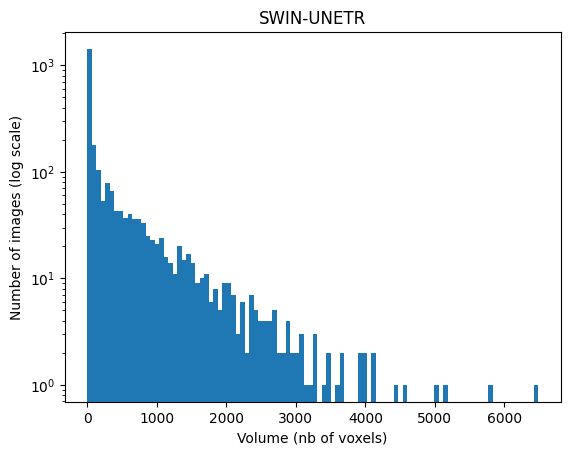

div1000_controls
Mean: 3.31, Std: 34.22, Non-zero: 773
Mean (non-zero): 29.57, Std (non-zero): 98.38
Max: 1114


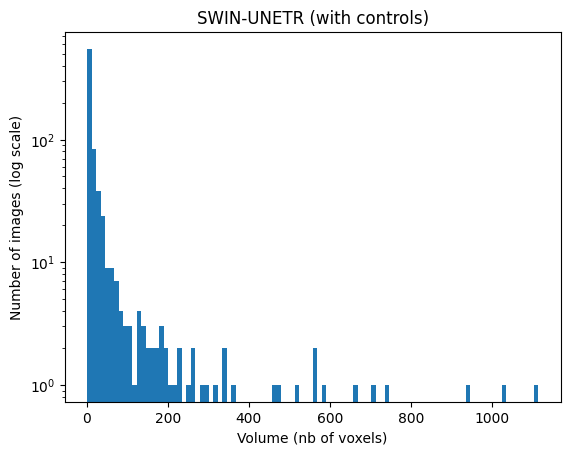

unet_controls
Mean: 140.17, Std: 401.35, Non-zero: 3500
Mean (non-zero): 276.33, Std (non-zero): 529.08
Max: 4920


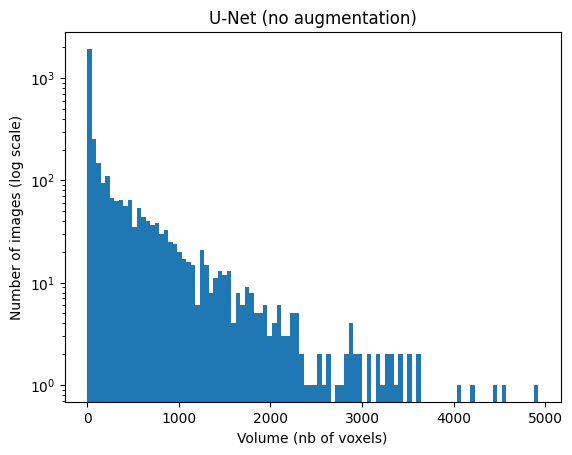

Wilcoxon between abnormal_controls and div1000_controls
WilcoxonResult(statistic=265283.0, pvalue=0.0)
TtestResult(statistic=23.5159229384742, pvalue=6.311153329572817e-120, df=13798.0)
Wilcoxon between abnormal_controls and unet_controls
WilcoxonResult(statistic=2202313.5, pvalue=1.263584227241805e-106)
TtestResult(statistic=-1.8760616890049382, pvalue=0.0606679029220387, df=13798.0)
Wilcoxon between div1000_controls and unet_controls
WilcoxonResult(statistic=305373.0, pvalue=0.0)
TtestResult(statistic=-28.220406816350213, pvalue=2.1648751252854467e-170, df=13798.0)


In [68]:
# load all the _vol_list.json files, print the mean, std, number of non-zero and plot the histograms
import json
import numpy as np
import matplotlib.pyplot as plt

correspondance_dict = {
    'abnormal_controls': 'SWIN-UNETR',
    'div1000_controls': 'SWIN-UNETR (with controls)',
    'unet_controls': 'U-Net (no augmentation)'
}

# load the json files
values_lists_dict = {}
for file in Path('/gamma/Dropbox (GIN)/UCL_Data/segmentations').glob('*_vol_list.json'):
    print(file.name.replace('_vol_list.json', ''))
    with open(file, 'r') as f:
        vol_list = [int(line.strip()) for line in f.readlines()]
    vol_list = np.array(vol_list)
    values_lists_dict[file.name.replace('_vol_list.json', '')] = vol_list
    print(f'Mean: {np.mean(vol_list):.2f}, Std: {np.std(vol_list):.2f}, Non-zero: {np.count_nonzero(vol_list)}')
    # print average voxels over the images with non-zero voxels
    print(f'Mean (non-zero): {np.mean(vol_list[vol_list != 0]):.2f}, Std (non-zero): {np.std(vol_list[vol_list != 0]):.2f}')
    # print max
    print(f'Max: {np.max(vol_list)}')
    # exclude the 0 values
    vol_list = vol_list[vol_list != 0]
    plt.hist(vol_list, bins=100, log=True)
    # add the legend for the axes
    plt.xlabel('Volume (nb of voxels)')
    plt.ylabel('Number of images (log scale)')
    plt.title(correspondance_dict[file.name.replace('_vol_list.json', '')])
    # save the plot in /gamma/Dropbox (GIN)/UCL_Data/segmentations/plots (create the folder)
    os.makedirs('/gamma/Dropbox (GIN)/UCL_Data/segmentations/plots', exist_ok=True)
    plt.savefig(Path('/gamma/Dropbox (GIN)/UCL_Data/segmentations/plots') / f'{file.name.replace("_vol_list.json", "")}.png')
    plt.show()
    plt.close()
# run a wilcoxon between each pair of lists in values_lists_dict
from scipy.stats import wilcoxon
from scipy.stats import ttest_ind
for key1, key2 in [('abnormal_controls', 'div1000_controls'), ('abnormal_controls', 'unet_controls'), ('div1000_controls', 'unet_controls')]:
    print(f'Wilcoxon between {key1} and {key2}')
    print(wilcoxon(values_lists_dict[key1], values_lists_dict[key2]))
    # run t-test
    print(ttest_ind(values_lists_dict[key1], values_lists_dict[key2]))

abnormal_controls
div1000_controls
unet_controls


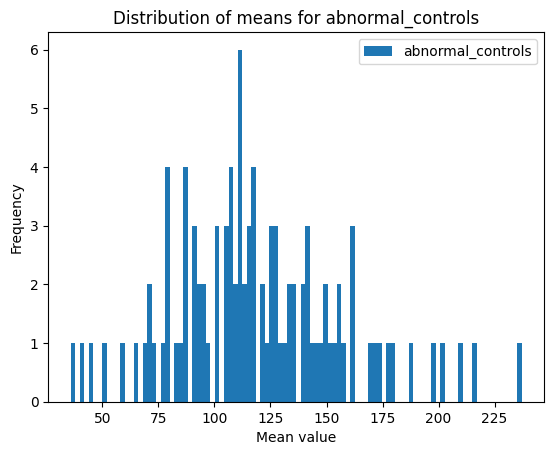

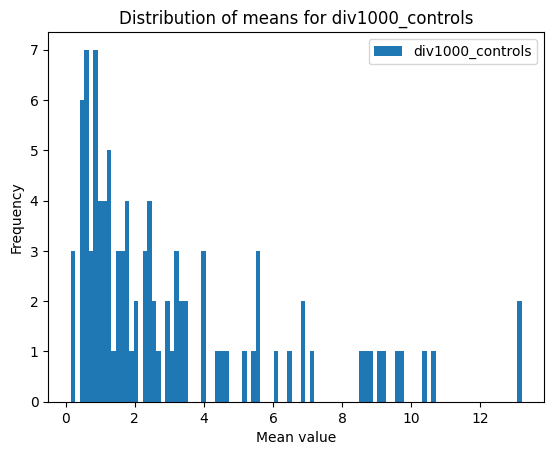

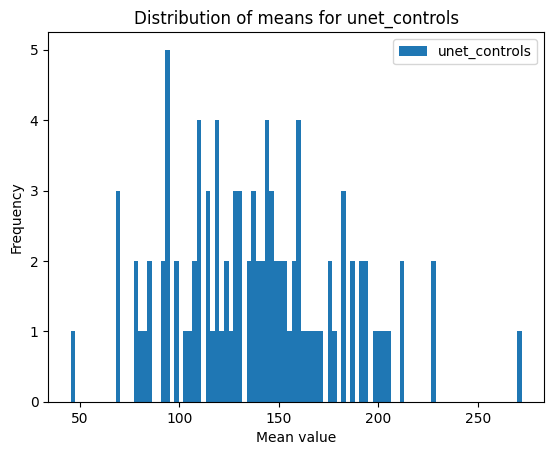

Paired t-test between abnormal_controls and div1000_controls
TtestResult(statistic=30.41174235907641, pvalue=5.027901651488196e-52, df=99)
Paired t-test between abnormal_controls and unet_controls
TtestResult(statistic=-3.437178720199382, pvalue=0.0008609179890149139, df=99)
Paired t-test between div1000_controls and unet_controls
TtestResult(statistic=-32.66906989770003, pvalue=7.930694329799466e-55, df=99)


In [52]:
# For each model:  Take bins of 100 random values and average the number of voxels and then plot
# the distribution of these averages
import numpy as np
import matplotlib.pyplot as plt
from bcblib.tools.general_utils import open_json, save_json
from pathlib import Path
    
correspondance_dict = {
    'abnormal_controls': 'SWIN-UNETR',
    'div1000_controls': 'SWIN-UNETR (with controls)',
    'unet_controls': 'U-Net (no augmentation)'
}

# load the json files
values_lists_dict = {}

for file in Path('/gamma/Dropbox (GIN)/UCL_Data/segmentations').glob('*_vol_list.json'):
    model_name = file.name.replace('_vol_list.json', '')
    print(model_name)
    values_lists_dict[model_name] = []
    with open(file, 'r') as f:
        vol_list = [int(line.strip()) for line in f.readlines()]
    vol_list = np.array(vol_list)
    for i in range(100):
        # take 100 random values
        random_values = np.random.choice(vol_list, 100)
        # compute the mean
        mean = np.mean(random_values)
        # add the mean to the dict
        values_lists_dict[model_name].append(mean)

# Iterate over each model
for model_name, means in values_lists_dict.items():
    # Create a new figure for each model
    plt.figure()

    # Plot the histogram of the means
    plt.hist(means, bins=100, label=model_name)

    # Add labels and title
    plt.xlabel('Mean value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of means for {model_name}')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()
    
    
# run a paired t-test between each pair of lists in values_lists_dict
from scipy.stats import ttest_rel
for key1, key2 in [('abnormal_controls', 'div1000_controls'), ('abnormal_controls', 'unet_controls'), ('div1000_controls', 'unet_controls')]:
    print(f'Paired t-test between {key1} and {key2}')
    print(ttest_rel(values_lists_dict[key1], values_lists_dict[key2]))

abnormal_controls
div1000_controls
unet_controls


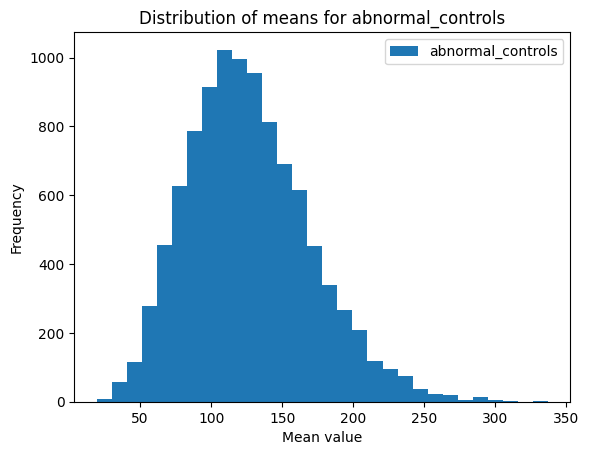

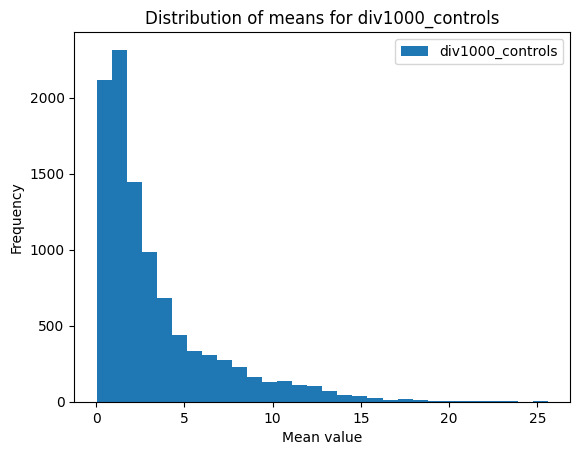

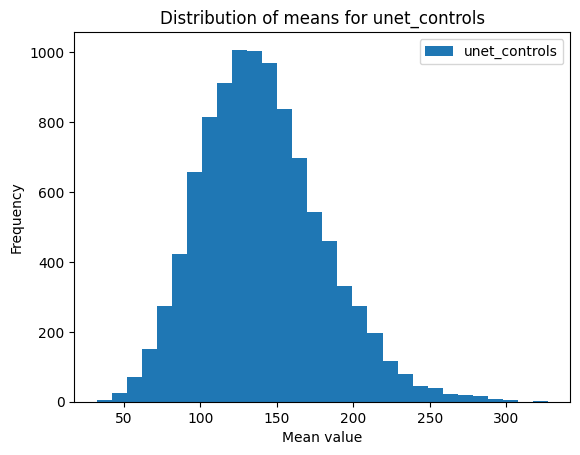

Paired t-test between abnormal_controls and div1000_controls
TtestResult(statistic=284.2007516595998, pvalue=0.0, df=9999)
Paired t-test between abnormal_controls and unet_controls
TtestResult(statistic=-23.320796013522237, pvalue=3.524802624382032e-117, df=9999)
Paired t-test between div1000_controls and unet_controls
TtestResult(statistic=-341.11118614334595, pvalue=0.0, df=9999)


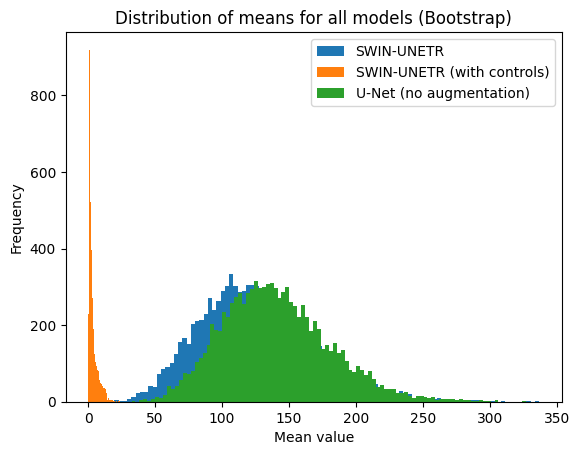

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from pathlib import Path

correspondance_dict = {
    'abnormal_controls': 'SWIN-UNETR',
    'div1000_controls': 'SWIN-UNETR (with controls)',
    'unet_controls': 'U-Net (no augmentation)'
}

# load the json files
values_lists_dict = {}

# We will create bootstrap samples
n_iterations = 10000
n_size = 100


for file in Path('/gamma/Dropbox (GIN)/UCL_Data/segmentations').glob('*_vol_list.json'):
    model_name = file.name.replace('_vol_list.json', '')
    print(model_name)
    with open(file, 'r') as f:
        vol_list = [int(line.strip()) for line in f.readlines()]
    vol_list = np.array(vol_list)
    
    # run bootstrap
    bootstrap_samples = list()
    for i in range(n_iterations):
        # prepare train and test sets
        s = resample(vol_list, n_samples=n_size)
        m = np.mean(s)
        # store statistic
        bootstrap_samples.append(m)
    
    values_lists_dict[model_name] = bootstrap_samples

# Iterate over each model
for model_name, means in values_lists_dict.items():
    # Create a new figure for each model
    plt.figure()

    # Plot the histogram of the means
    plt.hist(means, bins=30, label=model_name)

    # Add labels and title
    plt.xlabel('Mean value')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of means for {model_name}')

    # Show the legend
    plt.legend()

    # Display the plot
    plt.show()
    
# compute a paired t-test between each pair of lists in values_lists_dict
from scipy.stats import ttest_rel

for key1, key2 in [('abnormal_controls', 'div1000_controls'), ('abnormal_controls', 'unet_controls'), ('div1000_controls', 'unet_controls')]:
    print(f'Paired t-test between {key1} and {key2}')
    print(ttest_rel(values_lists_dict[key1], values_lists_dict[key2]))
    
from scipy.stats import norm
    
# plot the 3 distributions on the same plot
plt.figure()
plt.hist(values_lists_dict['abnormal_controls'], bins=100, label='SWIN-UNETR')

plt.hist(values_lists_dict['div1000_controls'], bins=100, label='SWIN-UNETR (with controls)')

plt.hist(values_lists_dict['unet_controls'], bins=100, label='U-Net (no augmentation)')

plt.xlabel('Mean value')
plt.ylabel('Frequency')
plt.title(f'Distribution of means for all models (Bootstrap)')
plt.legend()
# save the plot
plt.savefig('/gamma/Dropbox (GIN)/UCL_Data/segmentations/plots/distribution_of_means.png')
plt.show()


abnormal_controls
div1000_controls
unet_controls


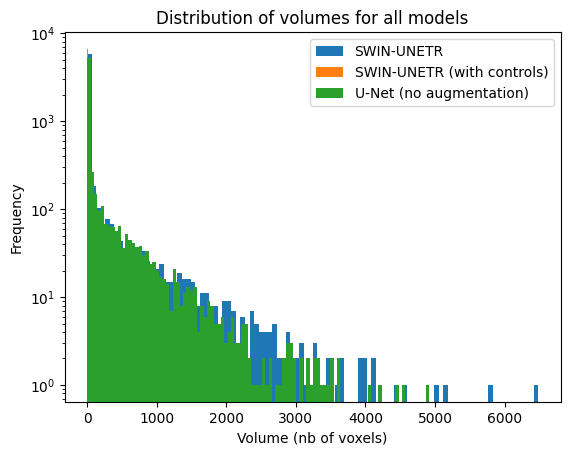

In [67]:
# plot the three distributions on the same plot
import numpy as np
import matplotlib.pyplot as plt
from bcblib.tools.general_utils import open_json, save_json
from pathlib import Path

correspondance_dict = {
    'abnormal_controls': 'SWIN-UNETR',
    'div1000_controls': 'SWIN-UNETR (with controls)',
    'unet_controls': 'U-Net (no augmentation)'
}

# load the json files
values_lists_dict = {}

for file in Path('/gamma/Dropbox (GIN)/UCL_Data/segmentations').glob('*_vol_list.json'):
    model_name = file.name.replace('_vol_list.json', '')
    print(model_name)
    with open(file, 'r') as f:
        vol_list = [int(line.strip()) for line in f.readlines()]
    vol_list = np.array(vol_list)
    values_lists_dict[model_name] = vol_list
    
# plot the 3 distributions on the same plot
plt.figure()
use_log = True
plt.hist(values_lists_dict['abnormal_controls'], bins=100, label='SWIN-UNETR', log=use_log)

plt.hist(values_lists_dict['div1000_controls'], bins=100, label='SWIN-UNETR (with controls)', log=use_log)
plt.hist(values_lists_dict['unet_controls'], bins=100, label='U-Net (no augmentation)', log=use_log)

plt.xlabel('Volume (nb of voxels)')
plt.ylabel('Frequency')
plt.title(f'Distribution of volumes for all models')
plt.legend()
# save the plot
plt.savefig('/gamma/Dropbox (GIN)/UCL_Data/segmentations/plots/distribution_of_volumes.png')
plt.show()

In [18]:
from bcblib.tools.general_utils import open_json, save_json
root_folder = '/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes'

# below this folder are models folders like "abnormal_training_dice_focal"
# ignore control_training_wf_div10_dicefocal as model folder
# below each model are noise_type_intensity_value folders like "rician_10" containing an all_folds_dataframe.csv file

# from each dataframe extract the mean and std of 'dice_metric'	'volume' and 'distance'
# save the values in a dict per noise type. 
# example: rician_dict = {model_name1: {mean_dice: [values], std_dice: [values], mean_volume: [values], std_volume: [values], mean_distance: [values], std_distance: [values]}, model_name2: {mean_dice: [values], std_dice: [values], mean_volume: [values], std_volume: [values], mean_distance: [values], std_distance: [values]}}
# save the dict as a json file in /gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/noise_type_dict.json
# max distance can be calculated from a nifti image
mni152_2mm_shape = (91, 109, 91) 
max_distance = np.sqrt(np.sum(np.square(mni152_2mm_shape)))

models_list = [f.name for f in Path(root_folder).iterdir() if f.is_dir() and f.name not in ['control_training_wf_div10_dicefocal', 'new_plots']]
noise_type_list = list(np.unique([''.join(d.name.split('_')[:-1]) for d in Path(root_folder,  models_list[0]).iterdir() if d.is_dir()]))

noise_dict_of_dicts = {}
for noise_type in noise_type_list:
    noise_dict_of_dicts[noise_type] = {model_name: {'mean_dice': [], 'std_dice': [], 'mean_volume': [], 'std_volume': [], 'mean_distance': [], 'std_distance': [], 'noise_intensity': []} for model_name in models_list}
    
for model_name in models_list:
    print(model_name)
    for noise_folder in Path(root_folder, model_name).iterdir():
        if not noise_folder.is_dir():
            continue
        noise_type = ''.join(noise_folder.name.split('_')[:-1])
        noise_intensity = int(noise_folder.name.split('_')[-1])
        # load the dataframe
        df = pd.read_csv(noise_folder / 'all_folds_dataframe.csv', header=0, index_col=0)
        if 'dice_metric' not in df.columns:
            continue  
        # Here we need to fix an issue with the distance values
        # If the volume is 0 AND the distance is 0 then the distance is wrong. It should be the maximum distance
        # We will set the distance to the maximum distance
        df.loc[(df['volume'] == 0) & (df['distance'] == 0), 'distance'] = max_distance
        # extract the mean and std of 'dice_metric'	'volume' and 'distance'
        noise_dict_of_dicts[noise_type][model_name]['mean_dice'].append(df['dice_metric'].mean())
        noise_dict_of_dicts[noise_type][model_name]['std_dice'].append(df['dice_metric'].std())
        noise_dict_of_dicts[noise_type][model_name]['mean_volume'].append(df['volume'].mean())
        noise_dict_of_dicts[noise_type][model_name]['std_volume'].append(df['volume'].std())
        noise_dict_of_dicts[noise_type][model_name]['mean_distance'].append(df['distance'].mean())
        noise_dict_of_dicts[noise_type][model_name]['std_distance'].append(df['distance'].std())
        noise_dict_of_dicts[noise_type][model_name]['noise_intensity'].append(noise_intensity)
        
# order the dict by noise intensity
for noise_type in noise_type_list:
    for model_name in models_list:
        noise_dict_of_dicts[noise_type][model_name]['mean_dice'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['mean_dice']))]
        noise_dict_of_dicts[noise_type][model_name]['std_dice'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['std_dice']))]
        noise_dict_of_dicts[noise_type][model_name]['mean_volume'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['mean_volume']))]
        noise_dict_of_dicts[noise_type][model_name]['std_volume'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['std_volume']))]
        noise_dict_of_dicts[noise_type][model_name]['mean_distance'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['mean_distance']))]
        noise_dict_of_dicts[noise_type][model_name]['std_distance'] = [x for _, x in sorted(zip(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'], noise_dict_of_dicts[noise_type][model_name]['std_distance']))]
        noise_dict_of_dicts[noise_type][model_name]['noise_intensity'] = sorted(noise_dict_of_dicts[noise_type][model_name]['noise_intensity'])
        
# save the dict as a json file in /gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/noise_type_dict.json
save_json('/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/noise_experiment_perf_dict.json', noise_dict_of_dicts)
        
    

abnormal_training_dice_focal
unet_abnormal_training
control_training_wf_div1000_dicefocal


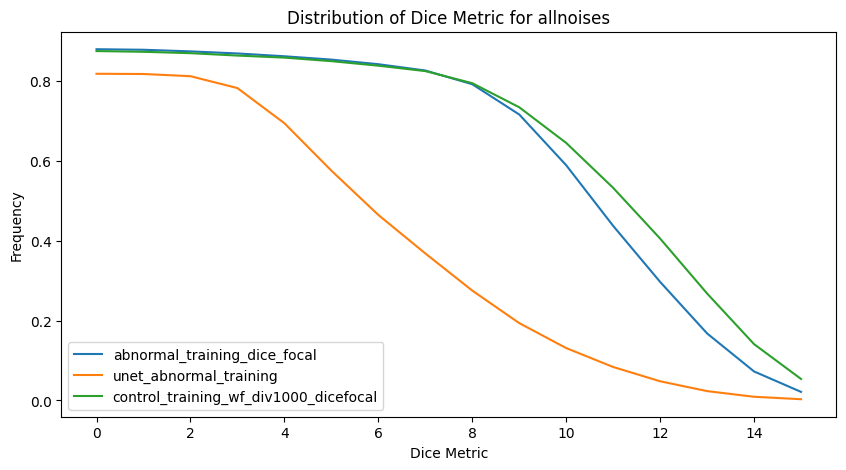

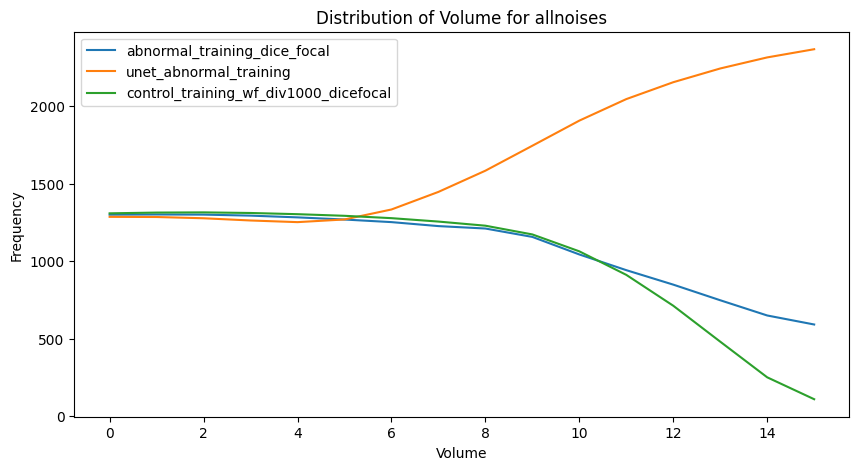

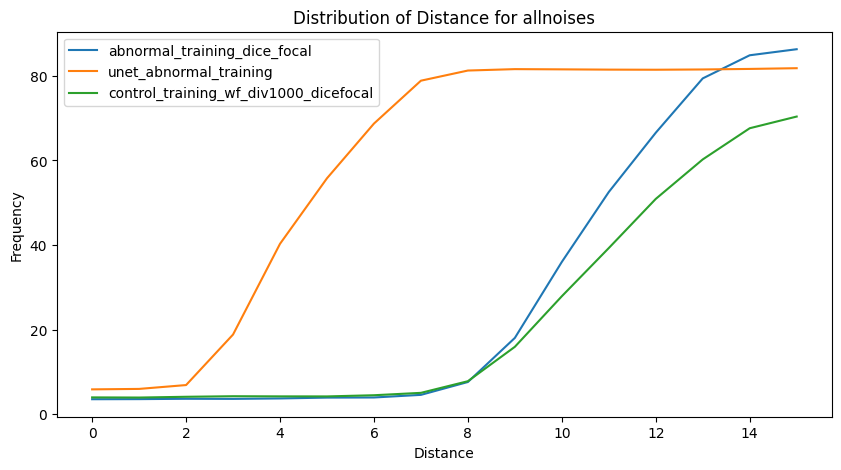

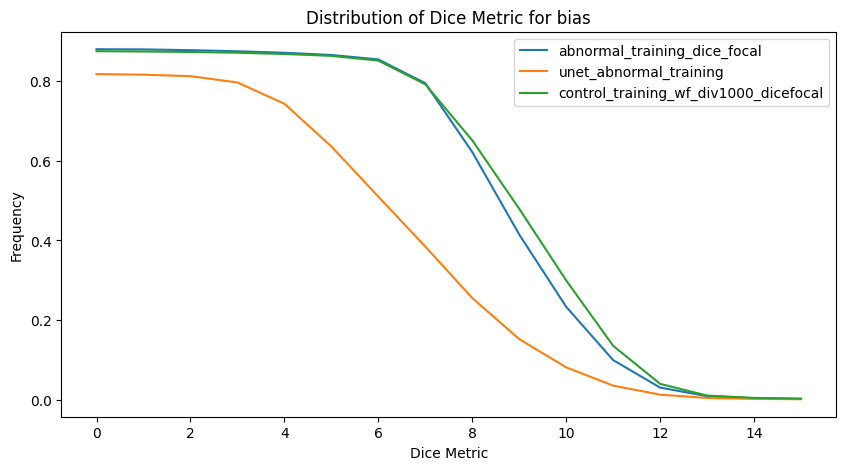

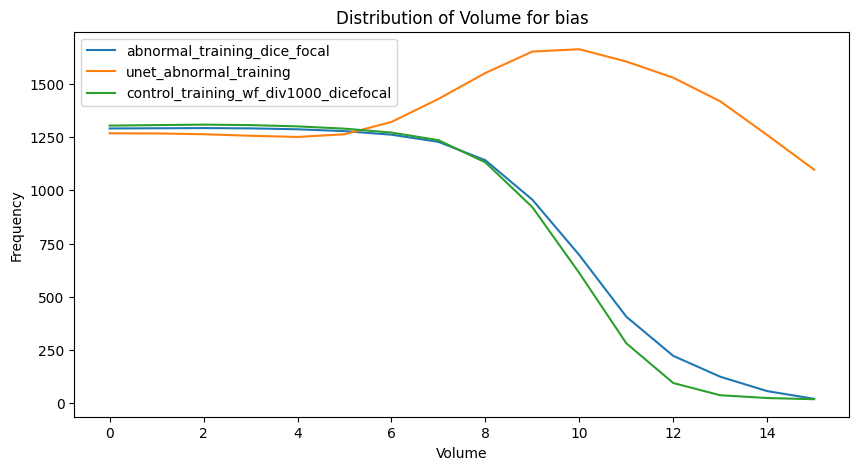

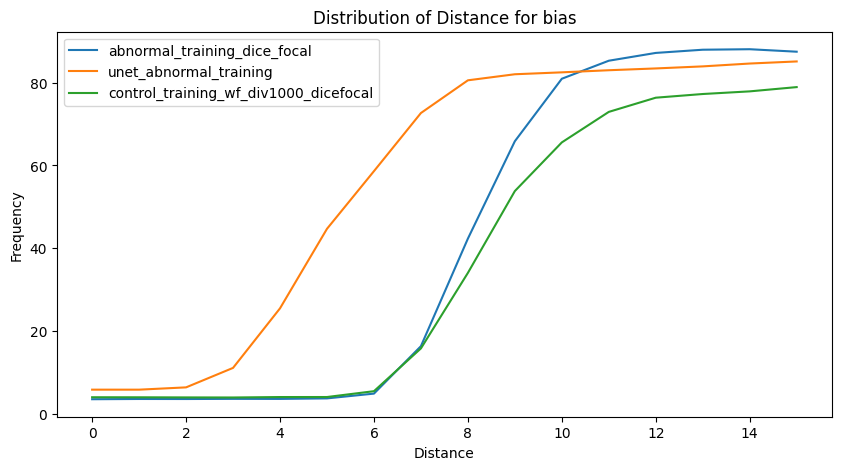

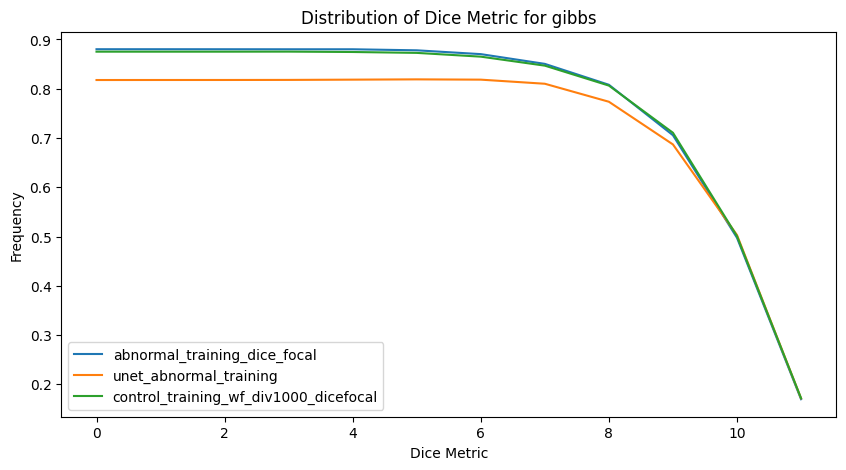

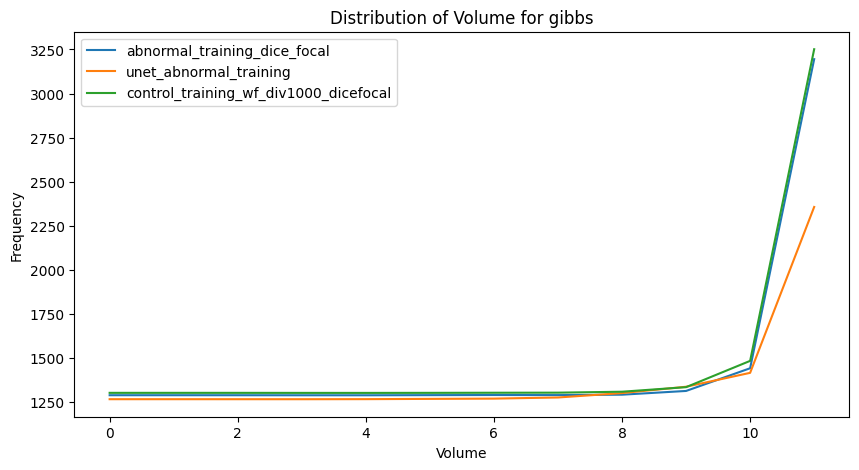

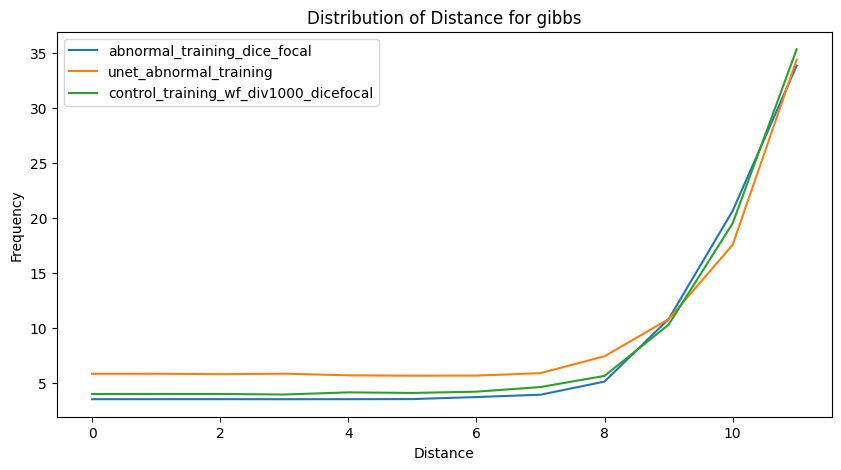

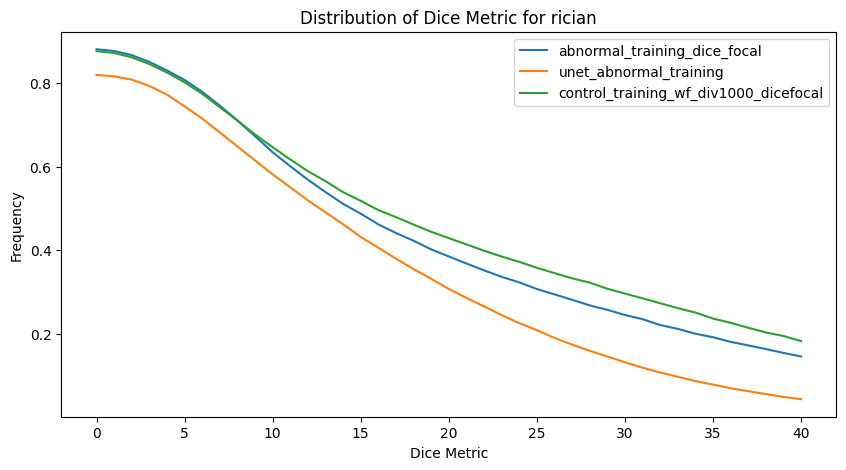

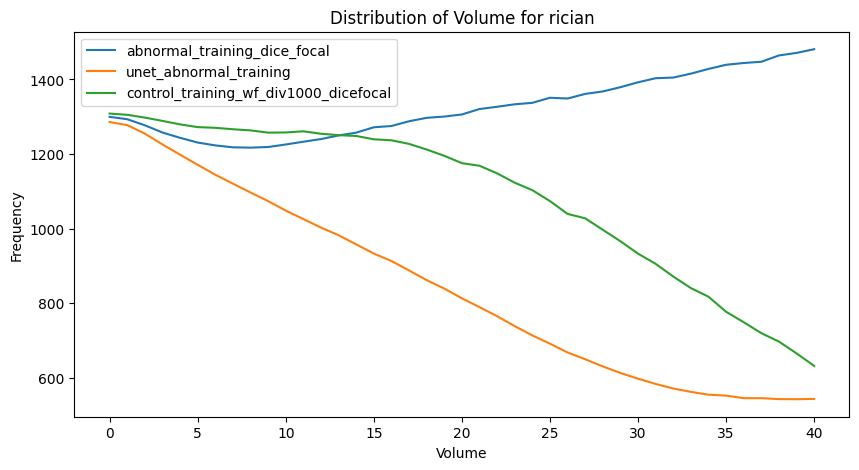

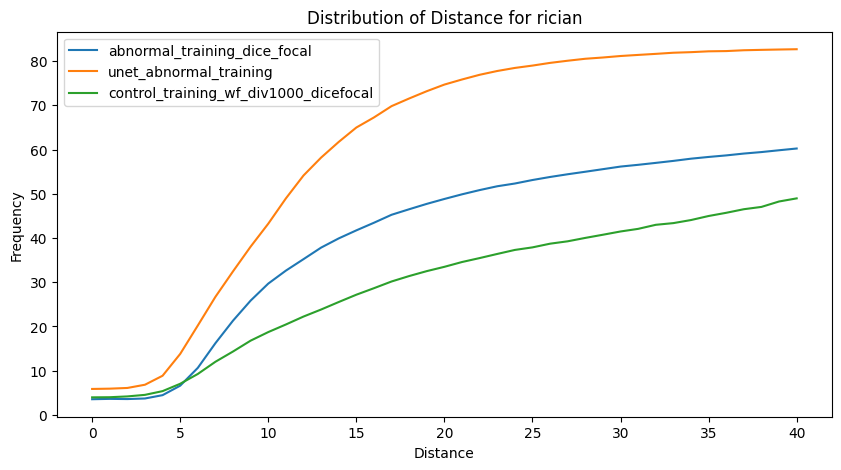

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import json
from scipy.stats import ttest_rel

# Load the data
with open('/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/noise_experiment_perf_dict.json', 'r') as f:
    noise_dict_of_dicts = json.load(f)
    
# print the first key and value
# print(list(noise_dict_of_dicts.keys())[0])
# print(list(noise_dict_of_dicts.values())[0])

# Define the metrics and their labels
metrics = {
    'dice': 'Dice Metric',
    'volume': 'Volume',
    'distance': 'Distance'
}
# increase the size of the plots 
plt.rcParams['figure.figsize'] = [10, 5]
# Iterate over each noise type
for noise_type, models_dict in noise_dict_of_dicts.items():
    # Iterate over each metric
    for metric, metric_label in metrics.items():
        # Create a new figure for each metric
        plt.figure()

        # Iterate over each model
        for model_name, values_dict in models_dict.items():
            # Plot the curves
            plt.plot(values_dict[f'mean_{metric}'], label=model_name)

        # Add labels and title
        plt.xlabel(metric_label)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {metric_label} for {noise_type}')

        # Show the legend
        plt.legend()

        # Display the plot
        plt.show()
        

In [16]:
# load /gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/control_training_wf_div1000_dicefocal/all_noises_0/all_folds_dataframe.csv and count how many row have 0 in the volume column
import pandas as pd

df = pd.read_csv('/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/control_training_wf_div1000_dicefocal/all_noises_0/all_folds_dataframe.csv', header=0, index_col=0)
print(df[df['volume'] == 0].shape[0])

# same with /gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/abnormal_training_dice_focal/all_noises_0/all_folds_dataframe.csv
df = pd.read_csv('/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/abnormal_training_dice_focal/all_noises_0/all_folds_dataframe.csv', header=0, index_col=0)
print(df[df['volume'] == 0].shape[0])

18
11


In [33]:
import pandas as pd
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# Get the list of models
models = list(noise_dict_of_dicts['allnoises'].keys())

# Define the metrics
# metrics = ['mean_dice', 'std_dice', 'mean_volume', 'std_volume', 'mean_distance', 'std_distance']
metrics = ['mean_dice', 'mean_volume', 'mean_distance']

# Get the list of noise types
noise_types = list(noise_dict_of_dicts.keys())

# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Noise Type', 'Model 1', 'Model 2', 'Metric', 't-statistic', 'p-value'])

# Iterate over each noise type
for noise_type in noise_types:
    # Iterate over each pair of models
    for i in range(len(models)):
        for j in range(i+1, len(models)):
            model1 = models[i]
            model2 = models[j]

            # Iterate over each metric
            for metric in metrics:
                # Get the data for the current metric for both models
                data1 = noise_dict_of_dicts[noise_type][model1][metric]
                data2 = noise_dict_of_dicts[noise_type][model2][metric]

                # Compute the paired t-test between the two models for the current metric
                t_stat, p_val = ttest_rel(data1, data2)

                # Create a DataFrame with the results
                result = pd.DataFrame([[noise_type, model1, model2, metric, t_stat, p_val]], columns=['Noise Type', 'Model 1', 'Model 2', 'Metric', 't-statistic', 'p-value'])

                # Append the results to the DataFrame
                results = pd.concat([results, result], ignore_index=True)

# # Apply the Benjamini-Hochberg procedure
# reject, pvals_corrected, _, _ = multipletests(results['p-value'], method='fdr_bh')
# 
# # Add the corrected p-values to the DataFrame
# results['p-value (corrected)'] = pvals_corrected
# 
# # Apply the Bonferroni-Holm procedure
# reject, pvals_corrected, _, _ = multipletests(results['p-value'], method='bonferroni')
# 
# # Add the corrected p-values to the DataFrame
# results['p-value (BHolm-corrected)'] = pvals_corrected

# apply all the corrections from multipletests to the p-values and add them to the dataframe
for method in ['fdr_bh', 'holm-sidak']:
    reject, pvals_corrected, _, _ = multipletests(results['p-value'], method=method, alpha=0.05)
    results[f'p-value ({method}-corrected)'] = pvals_corrected

# Print the results
print(results)

# Save the results
results.to_csv('/gamma/Dropbox (GIN)/UCL_Data/noise_dataframes/noise_experiment_ttest_results.csv')

   Noise Type                       Model 1  \
0   allnoises  abnormal_training_dice_focal   
1   allnoises  abnormal_training_dice_focal   
2   allnoises  abnormal_training_dice_focal   
3   allnoises  abnormal_training_dice_focal   
4   allnoises  abnormal_training_dice_focal   
5   allnoises  abnormal_training_dice_focal   
6   allnoises        unet_abnormal_training   
7   allnoises        unet_abnormal_training   
8   allnoises        unet_abnormal_training   
9        bias  abnormal_training_dice_focal   
10       bias  abnormal_training_dice_focal   
11       bias  abnormal_training_dice_focal   
12       bias  abnormal_training_dice_focal   
13       bias  abnormal_training_dice_focal   
14       bias  abnormal_training_dice_focal   
15       bias        unet_abnormal_training   
16       bias        unet_abnormal_training   
17       bias        unet_abnormal_training   
18      gibbs  abnormal_training_dice_focal   
19      gibbs  abnormal_training_dice_focal   
20      gibbs

/tmp/ipykernel_1097451/2520312380.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, result], ignore_index=True)


In [32]:
# '/home/chrisfoulon/neuro_data/umaps' contains umap models and embeddings for each model and the labels
# load the labels umap (joblib file) and embeddings (npy file)
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
!pip install joblib==1.3.1
import joblib


# list the files in folder
# umap_folder = Path('/home/chrisfoulon/neuro_data/umaps')
# print([f.name for f in umap_folder.iterdir() if f.is_file()])
"""
['labels_trained_umap.joblib', 'labels_umap_embedding.npy', 'abnormal_training_no_augs_unet_trained_umap.joblib', 'abnormal_training_no_augs_unet_umap_embedding.npy', 'control_training_wf_div1000_dicefocal_trained_umap.joblib', 'control_training_wf_div1000_dicefocal_umap_embedding.npy', 'abnormal_segmentation_dice_focal_trained_umap.joblib', 'abnormal_segmentation_dice_focal_umap_embedding.npy']
"""

# load the labels
labels_umap = joblib.load('/home/chrisfoulon/neuro_data/umaps/labels_trained_umap.joblib')
# load the embeddings
embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/labels_umap_embedding.npy')

# plot the embeddings with the labels
plt.figure()
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=labels_umap)
plt.title('Labels UMAP')
plt.savefig('/home/chrisfoulon/neuro_data/umaps/labels_umap.png')
plt.show()

# load the control_training_wf_div1000_dicefocal umap and embeddings and plot
div1000_umap = joblib.load('/home/chrisfoulon/neuro_data/umaps/control_training_wf_div1000_dicefocal_trained_umap.joblib')

div1000_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/control_training_wf_div1000_dicefocal_umap_embedding.npy')

plt.figure()
plt.scatter(div1000_embeddings[:, 0], div1000_embeddings[:, 1], c=labels_umap)
plt.title('Control Training WF Div1000 UMAP')
plt.savefig('/home/chrisfoulon/neuro_data/umaps/control_training_wf_div1000_umap.png')
plt.show()



  Obtaining dependency information for joblib==1.3.1 from https://files.pythonhosted.org/packages/28/08/9dcdaa5aac4634e4c23af26d92121f7ce445c630efa0d3037881ae2407fb/joblib-1.3.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 3.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2


TypeError: code() argument 13 must be str, not int

/home/chrisfoulon/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


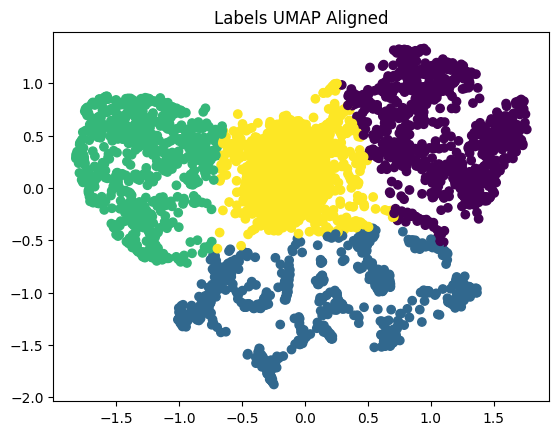

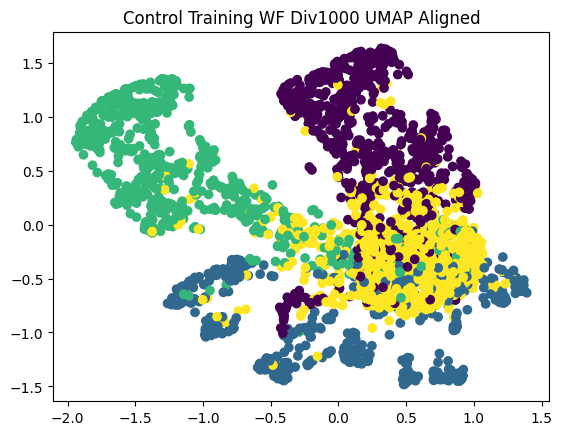

Mean of average cluster distances for labels embeddings: 0.7023313382829965
Mean of average cluster distances for div1000 embeddings: 0.8755960543447596
PearsonRResult(statistic=0.8994925668993978, pvalue=0.10050743310060217)
TtestResult(statistic=-4.161668913610851, pvalue=0.0252367657706827, df=3)
0.9337096111632506


/home/chrisfoulon/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


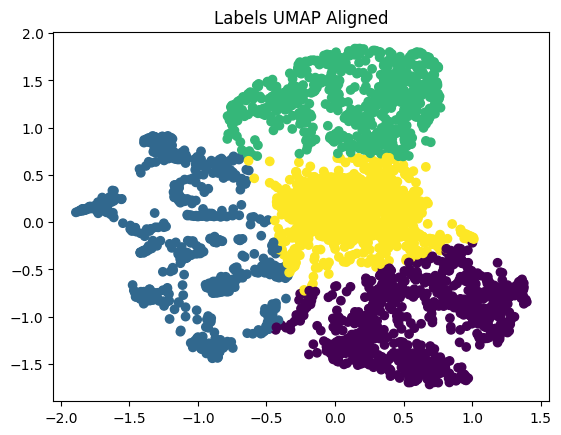

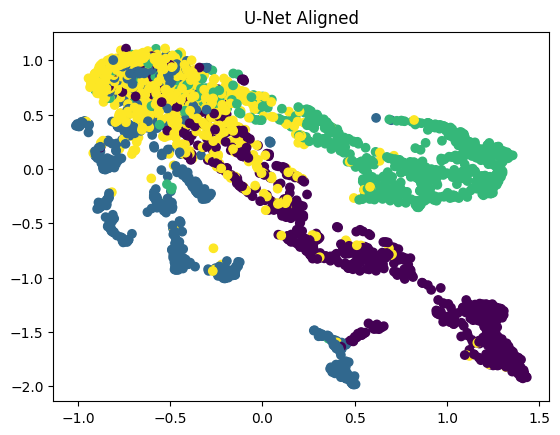

Mean of average cluster distances for labels embeddings: 0.70233146485197
Mean of average cluster distances for unet embeddings: 0.8977766460503034
PearsonRResult(statistic=0.7746193460191383, pvalue=0.22538065398086182)
TtestResult(statistic=-1.8120302278259361, pvalue=0.16764997488429575, df=3)
1.1346864058101545


/home/chrisfoulon/miniconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


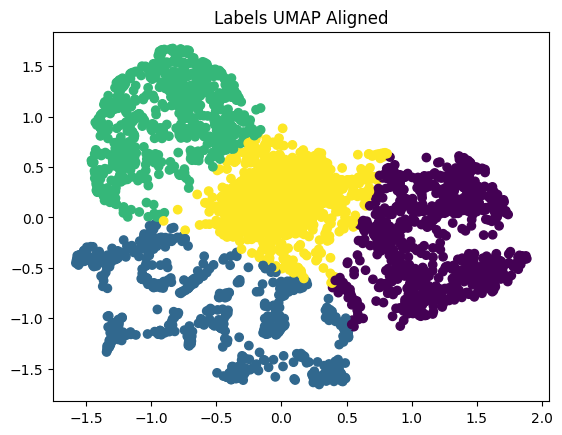

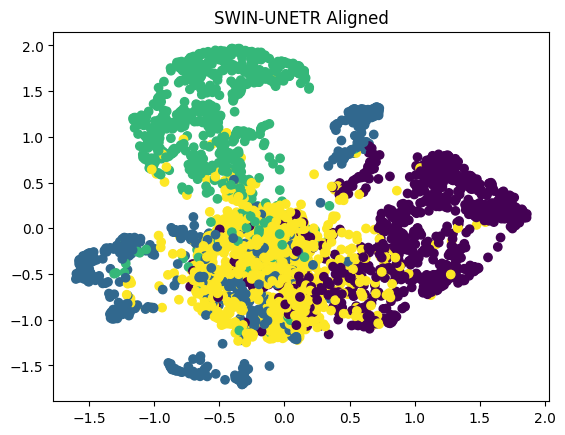

Mean of average cluster distances for labels embeddings: 0.7023313503217739
Mean of average cluster distances for swin_unetr embeddings: 0.9271995654325991
PearsonRResult(statistic=0.99246850363256, pvalue=0.007531496367439994)
TtestResult(statistic=-10.189690759737452, pvalue=0.0020143325360398867, df=3)
0.8597466737673874


In [7]:
import numpy as np
from scipy.spatial import distance
from scipy.linalg import svd
from sklearn.cluster import KMeans
from scipy.stats import pearsonr, ttest_rel

def align_embeddings(embedding1, embedding2):
    # work on copies of the embeddings
    embedding1 = embedding1.copy()
    embedding2 = embedding2.copy()
    # Translate the embeddings
    center_of_mass1 = np.mean(embedding1, axis=0)
    center_of_mass2 = np.mean(embedding2, axis=0)
    embedding1 -= center_of_mass1
    embedding2 -= center_of_mass2

    # Scale the embeddings
    average_norm1 = np.mean(np.linalg.norm(embedding1, axis=1))
    average_norm2 = np.mean(np.linalg.norm(embedding2, axis=1))
    embedding1 /= average_norm1
    embedding2 /= average_norm2

    # Compute the matrix product of the first embedding and the second embedding transposed
    matrix_product = np.dot(embedding1.T, embedding2)

    # Perform a singular value decomposition on this matrix product
    U, _, Vt = svd(matrix_product)

    # Compute the rotation matrix
    rotation_matrix = np.dot(Vt.T, U.T)

    # Rotate the first embedding
    rotated_embedding1 = np.dot(embedding1, rotation_matrix)

    return rotated_embedding1, embedding2


def compute_average_cluster_distances(embeddings, labels):
    unique_labels = np.unique(labels)
    average_distances = []

    for label in unique_labels:
        # Select the points that belong to this cluster
        cluster_points = embeddings[labels == label]

        # Compute the pairwise distances between these points
        dist_matrix = distance.squareform(distance.pdist(cluster_points))

        # Compute the mean of the upper triangle of this distance matrix (excluding the diagonal)
        mean_distance = np.mean(dist_matrix[np.triu_indices(dist_matrix.shape[0], k=1)])

        average_distances.append(mean_distance)

    return average_distances


labels_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/labels_umap_embedding.npy')
div1000_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/control_training_wf_div1000_dicefocal_umap_embedding.npy')
unet_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/abnormal_training_no_augs_unet_umap_embedding.npy')
swin_unetr_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/abnormal_segmentation_dice_focal_umap_embedding.npy')

# for each embedding, align it with the labels embedding then compute the average distance between each point and the corresponding point in the labels embedding
labels_embeddings_aligned, div1000_embeddings_aligned = align_embeddings(labels_embeddings, div1000_embeddings)

num_clusters = 4
# compute a K-means clustering on the aligned labels embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(labels_embeddings_aligned)
# plot the labels_embeddings_aligned with the cluster labels
plt.figure()
plt.scatter(labels_embeddings_aligned[:, 0], labels_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('Labels UMAP Aligned')
plt.show()

# apply the same clustering to the aligned div1000_embeddings
plt.figure()
plt.scatter(div1000_embeddings_aligned[:, 0], div1000_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('Control Training WF Div1000 UMAP Aligned')
plt.show()

# for each cluster label in kmeans.labels_ compute the average distance between each point to each other point in the cluster and save the mean in a list. Do that for each cluster label for both embeddings and then print the mean of each list
# Compute the average cluster distances for the aligned labels and div1000 embeddings
average_distances_labels = compute_average_cluster_distances(labels_embeddings_aligned, kmeans.labels_)
average_distances_div1000 = compute_average_cluster_distances(div1000_embeddings_aligned, kmeans.labels_)

# Print the mean of each list
print(f'Mean of average cluster distances for labels embeddings: {np.mean(average_distances_labels)}')
print(f'Mean of average cluster distances for div1000 embeddings: {np.mean(average_distances_div1000)}')

# compute a pearson correlation between average_distances_labels and average_distances_div1000
print(pearsonr(average_distances_labels, average_distances_div1000))
# compute a paired t-test between average_distances_labels and average_distances_div1000
print(ttest_rel(average_distances_labels, average_distances_div1000))


# compute the distance VECTOR between the aligned embeddings
div1000_dist_matrix_aligned = distance.cdist(div1000_embeddings_aligned, labels_embeddings_aligned, 'euclidean')

# print the average of the diagonal of the distance matrix
print(np.mean(np.diag(div1000_dist_matrix_aligned)))


labels_embeddings_aligned, unet_embeddings_aligned = align_embeddings(labels_embeddings, unet_embeddings)
# compute the distance matrix between the aligned embeddings
unet_dist_matrix_aligned = distance.cdist(unet_embeddings_aligned, labels_embeddings_aligned, 'euclidean')

# compute the K-means clustering on the aligned labels embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(labels_embeddings_aligned)
# plot the labels_embeddings_aligned with the cluster labels
plt.figure()
plt.scatter(labels_embeddings_aligned[:, 0], labels_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('Labels UMAP Aligned')
plt.show()

# apply the same clustering to the aligned unet_embeddings
plt.figure()
plt.scatter(unet_embeddings_aligned[:, 0], unet_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('U-Net Aligned')
plt.show()

# compute the average cluster distances for the aligned labels and unet embeddings
average_distances_labels = compute_average_cluster_distances(labels_embeddings_aligned, kmeans.labels_)
average_distances_unet = compute_average_cluster_distances(unet_embeddings_aligned, kmeans.labels_)

# Print the mean of each list
print(f'Mean of average cluster distances for labels embeddings: {np.mean(average_distances_labels)}')
print(f'Mean of average cluster distances for unet embeddings: {np.mean(average_distances_unet)}')

# compute a pearson correlation between average_distances_labels and average_distances_unet
print(pearsonr(average_distances_labels, average_distances_unet))
# compute a paired t-test between average_distances_labels and average_distances_unet
print(ttest_rel(average_distances_labels, average_distances_unet))

# print the average of the diagonal of the distance matrix
print(np.mean(np.diag(unet_dist_matrix_aligned)))

labels_embeddings_aligned, swin_unetr_embeddings_aligned = align_embeddings(labels_embeddings, swin_unetr_embeddings)
# compute the distance matrix between the aligned embeddings
swin_unetr_dist_matrix_aligned = distance.cdist(swin_unetr_embeddings_aligned, labels_embeddings_aligned, 'euclidean')

# compute the K-means clustering on the aligned labels embeddings
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(labels_embeddings_aligned)
# plot the labels_embeddings_aligned with the cluster labels
plt.figure()
plt.scatter(labels_embeddings_aligned[:, 0], labels_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('Labels UMAP Aligned')
plt.show()

# apply the same clustering to the aligned swin_unetr_embeddings
plt.figure()
plt.scatter(swin_unetr_embeddings_aligned[:, 0], swin_unetr_embeddings_aligned[:, 1], c=kmeans.labels_)
plt.title('SWIN-UNETR Aligned')
plt.show()


# compute the average cluster distances for the aligned labels and swin_unetr embeddings
average_distances_labels = compute_average_cluster_distances(labels_embeddings_aligned, kmeans.labels_)
average_distances_swin_unetr = compute_average_cluster_distances(swin_unetr_embeddings_aligned, kmeans.labels_)
# Print the mean of each list
print(f'Mean of average cluster distances for labels embeddings: {np.mean(average_distances_labels)}')
print(f'Mean of average cluster distances for swin_unetr embeddings: {np.mean(average_distances_swin_unetr)}')

# compute a pearson correlation between average_distances_labels and average_distances_swin_unetr
print(pearsonr(average_distances_labels, average_distances_swin_unetr))
# compute a paired t-test between average_distances_labels and average_distances_swin_unetr
print(ttest_rel(average_distances_labels, average_distances_swin_unetr))


# print the average of the diagonal of the distance matrix
print(np.mean(np.diag(swin_unetr_dist_matrix_aligned)))





In [79]:
import numpy as np
from scipy.spatial import distance

# Load the UMAP embeddings
# Replace 'embeddings.npy' with the path to your numpy file
div1000_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/control_training_wf_div1000_dicefocal_umap_embedding.npy')

# Calculate the Euclidean distance between each pair of points
div1000_dist_matrix = distance.cdist(div1000_embeddings, div1000_embeddings, 'euclidean')


# load the labels embedding and compute the distance matrix
# labels_umap = joblib.load('/home/chrisfoulon/neuro_data/umaps/labels_trained_umap.joblib')
labels_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/labels_umap_embedding.npy')
labels_dist_matrix = distance.cdist(labels_embeddings, labels_embeddings, 'euclidean')

# align the embeddings
div1000_embeddings_aligned, labels_embeddings_aligned = align_embeddings(div1000_embeddings, labels_embeddings)

# compute the distance matrix between the aligned embeddings
div1000_dist_matrix_aligned = distance.cdist(div1000_embeddings_aligned, div1000_embeddings_aligned, 'euclidean')

labels_dist_matrix_aligned = distance.cdist(labels_embeddings_aligned, labels_embeddings_aligned, 'euclidean')

# print the correlation between the distance matrices
from scipy.stats import pearsonr
print(pearsonr(div1000_dist_matrix.flatten(), labels_dist_matrix.flatten()))

# load the other embeddings and compute the distance matrix
# abnormal_training_umap = joblib.load('/home/chrisfoulon/neuro_data/umaps/abnormal_training_no_augs_unet_trained_umap.joblib')
abnormal_training_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/abnormal_training_no_augs_unet_umap_embedding.npy')
abnormal_training_dist_matrix = distance.cdist(abnormal_training_embeddings, abnormal_training_embeddings, 'euclidean')

# abnormal_segmentation_umap = joblib.load('/home/chrisfoulon/neuro_data/umaps/abnormal_segmentation_dice_focal_trained_umap.joblib')
abnormal_segmentation_embeddings = np.load('/home/chrisfoulon/neuro_data/umaps/abnormal_segmentation_dice_focal_umap_embedding.npy')
abnormal_segmentation_dist_matrix = distance.cdist(abnormal_segmentation_embeddings, abnormal_segmentation_embeddings, 'euclidean')

    
# compute the pearson correlation between the matrices and the labels matrix
from scipy.stats import pearsonr
print(pearsonr(div1000_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(pearsonr(abnormal_training_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(pearsonr(abnormal_segmentation_dist_matrix.flatten(), labels_dist_matrix.flatten()))

# compare abnormal to div1000
print(pearsonr(abnormal_segmentation_dist_matrix.flatten(), div1000_dist_matrix.flatten()))




PearsonRResult(statistic=0.5162341308993096, pvalue=0.0)
PearsonRResult(statistic=0.5162341308993096, pvalue=0.0)
PearsonRResult(statistic=0.3577934540695982, pvalue=0.0)
PearsonRResult(statistic=0.5852956811577011, pvalue=0.0)
PearsonRResult(statistic=0.7341214907794094, pvalue=0.0)


In [81]:
# Run a paired t-test between the distance matrices, try also with a non-parametric test
from scipy.stats import ttest_rel
# import non-parametric test
from scipy.stats import wilcoxon

print(ttest_rel(div1000_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(ttest_rel(abnormal_training_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(ttest_rel(abnormal_segmentation_dist_matrix.flatten(), labels_dist_matrix.flatten()))

# compare abnormal to div1000
print(ttest_rel(abnormal_segmentation_dist_matrix.flatten(), div1000_dist_matrix.flatten()))

# non-parametric tests
print(wilcoxon(div1000_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(wilcoxon(abnormal_training_dist_matrix.flatten(), labels_dist_matrix.flatten()))

print(wilcoxon(abnormal_segmentation_dist_matrix.flatten(), labels_dist_matrix.flatten()))

# compare abnormal to div1000
print(wilcoxon(abnormal_segmentation_dist_matrix.flatten(), div1000_dist_matrix.flatten()))




TtestResult(statistic=395.54597552611017, pvalue=0.0, df=12694968)
TtestResult(statistic=1939.8070659323864, pvalue=0.0, df=12694968)
TtestResult(statistic=213.92682621242008, pvalue=0.0, df=12694968)
TtestResult(statistic=-272.7587054809815, pvalue=0.0, df=12694968)
WilcoxonResult(statistic=35731023591681.0, pvalue=0.0)
WilcoxonResult(statistic=18928092080773.0, pvalue=0.0)
WilcoxonResult(statistic=36396174565692.0, pvalue=0.0)
WilcoxonResult(statistic=39546522329802.0, pvalue=0.0)
